In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.load('../../../2/17/lidar/1490993715582987000.npy')
b = np.load('1490991637082466000.npy')

In [3]:
def get_lidar_rings(lidar, rings, points_per_ring, pad):
    lidar_d_i    = np.empty((rings, points_per_ring, 2))
    lidar_points = np.empty((rings, points_per_ring, 3))
    PAD = pad # half of receptive field
    for i in range(rings):
        l  = lidar[lidar[:,4] == i]
        lp = l.shape[0]
        assert  lp<= (points_per_ring + PAD *2)
        lidar_d_i[i, PAD:PAD+lp]    = np.vstack((np.linalg.norm(l[:,:3], axis=1), l[:,3])).T
        lidar_d_i[i, :PAD]    = lidar_d_i[i, PAD]
        lidar_d_i[i, PAD+lp:] = lidar_d_i[i, PAD+lp-1]

        lidar_points[i, PAD:PAD+lp]    = l[:,:3]
        lidar_points[i, :PAD]    = lidar_points[i, PAD]
        lidar_points[i, PAD+lp:] = lidar_points[i, PAD+lp-1]
    return (lidar_d_i, lidar_points)

In [4]:
ad,ap = get_lidar_rings(a,32,3000,0)
bd,bp = get_lidar_rings(b,32,3000,0)


In [5]:
import scipy.interpolate

def aliased(lidar,rings, points_per_ring):
    lidar_d_r    = np.empty((rings, points_per_ring, 2))
    for i in range(rings):
        l  = lidar[lidar[:,4] == i]
        lp = l.shape[0]
        #assert  lp<= (points_per_ring + PAD *2)
        _d = np.linalg.norm(l[:,:3], axis=1) # total distance
        _r = np.arctan2(l[:,1], l[:,0]) # y/x
        _p = np.arctan2(l[:,2], np.linalg.norm(l[:,:2], axis=1))     # z/sqrt(x**2+y**2)
        __d = scipy.interpolate.interp1d(_r, _d, fill_value = 'extrapolate', kind='nearest')
        _i = l[:,3]
        _int_d = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = _d)
        _int_d = __d(np.linspace(-np.pi,(points_per_ring-1)*np.pi/points_per_ring,num=points_per_ring))

        _int_i = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = _i)
        _int_r = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = _r)
        _int_p = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = _p)

        lidar_d_r[i]    = np.vstack((_int_d, _int_r)).T
        #lidar_r_p[i]    = np.vstack((_int_r, _int_p)).T

        _int_x = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = l[:,0])
        _int_y = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = l[:,1])
        _int_z = np.interp(np.linspace(0,1.,num=points_per_ring), xp = np.linspace(0,1.,num=lp), fp = l[:,2])

        #lidar_d_r[i]  = np.vstack((_int_x, _int_y, _int_z)).T
    return lidar_d_r

In [6]:
aidr = aliased(a,32,3000)


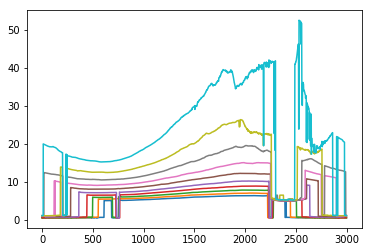

In [7]:
plt.figure()
for i in range(11,20):
    #plt.plot(np.clip(np.diff(aidr[i,:,0]),-0.5,0.5))
    plt.plot(aidr[i,:,0])

    #plt.plot(ad[i,:,0])



##### plt.figure()

for i in range(10,11):
    plt.plot((aidr[i,:,1]))
    plt.plot((aidr[i+1,:,1]))
    plt.figure()
    plt.plot((aidr[i,:,0]))
    plt.plot((aidr[i+1,:,0]))


# 